In [1]:
import numpy as np
import random 
from math import sqrt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

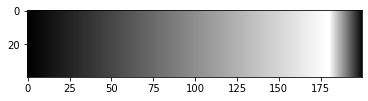

In [2]:
nx = 200
ny = 40
nh = 15
nbase = 5

base1 = np.zeros((ny,nx)) # light level
grad  = np.zeros((ny,nx)) # gradient

nx0 = int(0.9*nx) # assymmetry of the system 0.5 = symmetric

for i in range(nx0):
    val = int(i*255/(nx0-1))
    base1[:,i] = val
    grad[:,i] = (ny/nx0)
#   
for i in range(nx0,nx):
    val=int((nx-i)*254/(nx-nx0))
    base1[:,i] =val
    grad[:,i] = -(ny/(nx-nx0))
    #print(i,val)
plt.imshow(base1,cmap='gray')

255.0

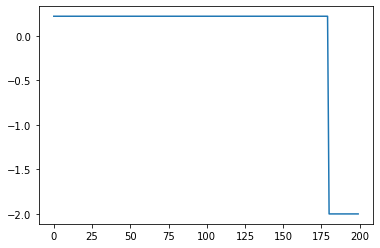

In [3]:
plt.plot(grad[10,:])
np.max(base1)

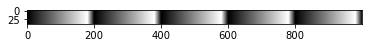

In [4]:
#create rachet by repeating nbase times
frame = np.zeros((ny,nbase*nx))
grame = np.zeros((ny,nbase*nx))
for j in range(nbase):
    for i in range(nx):
        frame[:,  j*nx+i] = base1[:,i]
        grame[:,  j*nx+i] = grad[:,i]
    
plt.imshow(frame,cmap='gray')

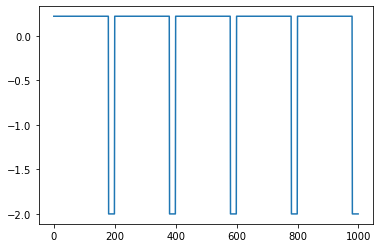

In [5]:
plt.plot(grame[10,:])

In [6]:
# move the partile randomly but with bios in the x-direction nstep
def move(xx,yy,grame,amp,nstep):
#
# (x,y) present position of the partile
# xx and yy contain history of x and y
# delta = bias in probality in the +x direction
#
    h = grame.shape[0] 
    w = grame.shape[1]   
    x = xx[-1]
    y = yy[-1]
    for i in range(nstep):
        delta = grame[y,x]*amp
        r = random.uniform(0,1)
        if r <= 0.25+delta :
            x= x + 1
        if r >0.25+delta and r <= 0.5:
            x = x - 1
        if r > 0.5 and r <= 0.75:
            y = y + 1
        if r >0.75 :
            y = y - 1
#pbc    
        if x > w-1 :
            x = 0
        if y > h-1 :
            y = 0
        if x < 0:
            x = w-1
        if y < 0:
            y= h -1
            
        # add last position
        xx.append(x)
        yy.append(y)

In [7]:
# main 
bamp = 1.0 # if the sign of bamp is reversed, the particle will move in the opposite direction
damp = 0.0
nstep = 200
bstep = 50
dstep = 500
xx = []
yy = []
h = frame.shape[0]
w = frame.shape[1]
yy.append(int(h/2))
xx.append(int(200))
for j in range(nstep):
    move(xx,yy,grame,bamp,bstep) #bright cycle with uneven light distribution bamp != 0
    move(xx,yy,grame,damp,dstep) #dark cycle with even light distribution, damp = 0.0

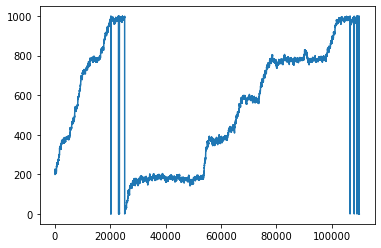

In [8]:
plt.plot(xx)

(array([ 1903., 27181.,  2435., 11782.,  5264.,  9313.,  3229., 27666.,
         5455., 15773.]),
 array([  0. ,  99.9, 199.8, 299.7, 399.6, 499.5, 599.4, 699.3, 799.2,
        899.1, 999. ]),
 <a list of 10 Patch objects>)

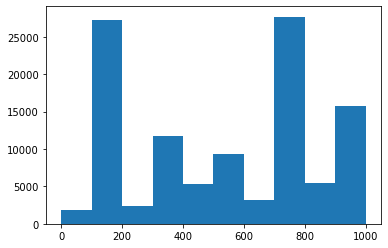

In [9]:
plt.hist(xx)

In [10]:
# make movie
fps = 60
video_name = 'd:/test2.avi'
height = np.shape(frame)[0]+ny
width  = np.shape(frame)[1]
#tmp = np.zeros((width,height,3))
tmp = np.zeros((height,width,3), np.uint8)
video = cv2.VideoWriter(video_name, 0, fps, (width,height))
ntotal = len(xx)
#ntotal = 300000
nframe = 5
pic = []
    
for i in range(ny):
    tmp[height-i-1,:,0]= frame[i,:]
    
for i in range(0,ntotal,50):
    if i > 0:
        tmp[oy-1:oy+1,x-1:ox+1,0]=0
        tmp[oy-1:oy+1,x-1:ox+1,1]=0
        tmp[oy-1:oy+1,x-1:ox+1,2]=0
    x = xx[i]
    y = yy[i] 
    ox = x
    oy = y
    tmp[y-1:y+1,x-1:x+1,0]=255
    tmp[y-1:y+1,x-1:x+1,1]=255
    tmp[y-1:y+1,x-1:x+1,2]=255
    video.write(tmp)

cv2.destroyAllWindows()
video.release()


In [ ]:
# no more lines below this line